# Assignment 3: Regression and Regularization

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Regression Models
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

### EDA and Feature Engineering

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/srenna/schulich_data_science/main/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [42]:
print("Missing Values Distribution:")
print(df.isnull().mean())
print("")

Missing Values Distribution:
id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64



There are no missing values from the dataset. Therefore, no imputation or drops are required. 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Creating dummy variables is typically necessary when dealing with categorical variables. All the columns in the King County dataset are already numeric,and as such, the transformation is not required.

In [44]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [45]:
df['date'] = pd.to_datetime(df['date'])
df['Sale Year'] = df['date'].dt.year
df['Sale Month'] = df['date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_13500\1151501813.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

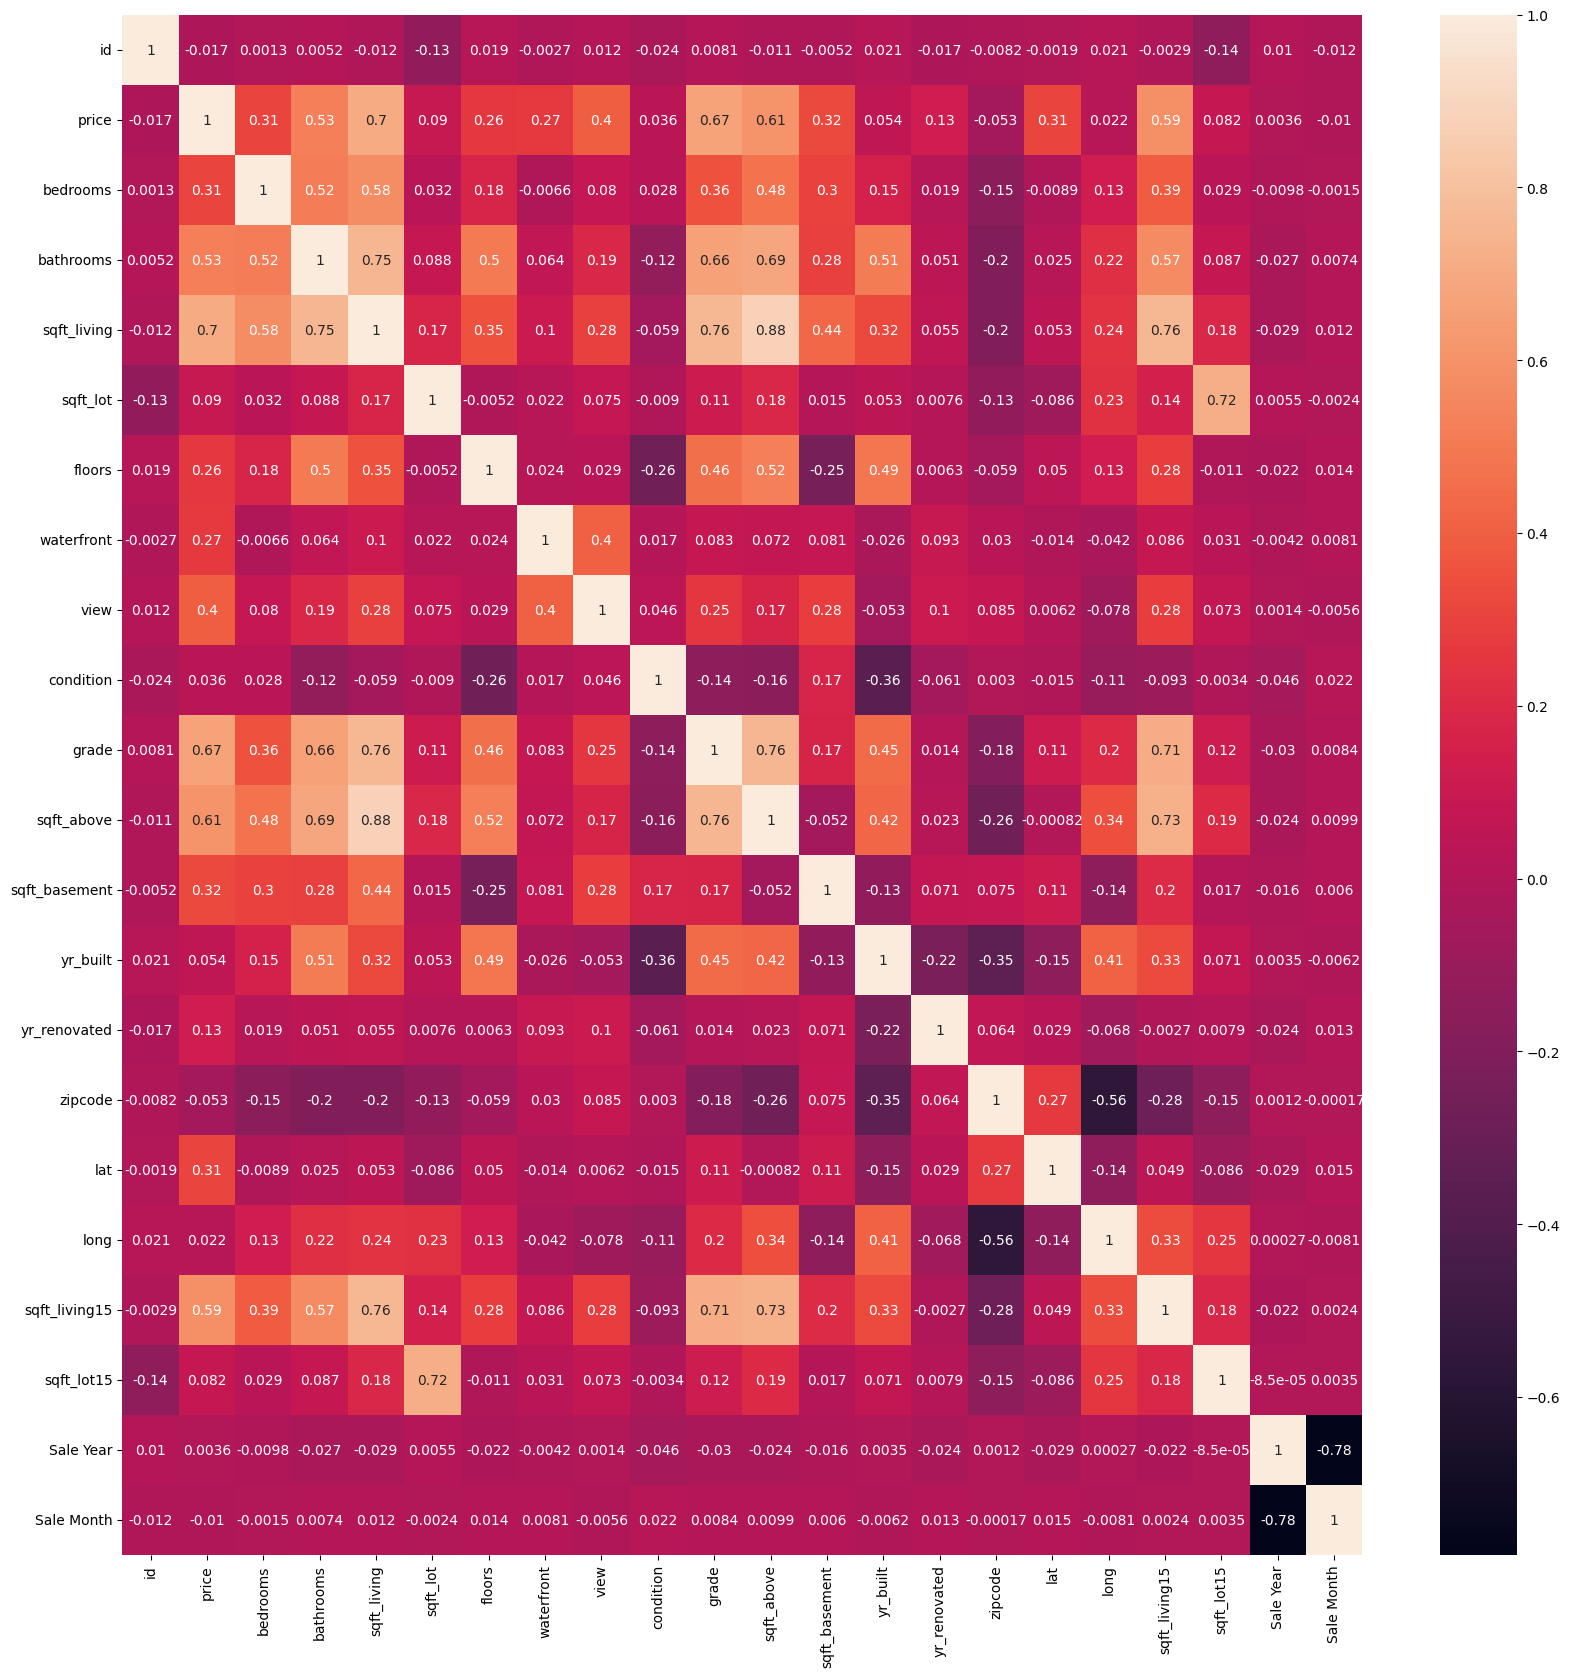

In [46]:
# let's examine colinearity to make sure we are not putting redundant parameters in our linear model 
# df.corr(numeric_only=True)
#Exploration
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

Given the scale of dataset, we see the mutlicollinearity is likely to be a problem.
For example. sqft_lot15, yr_built, condition and sqft_lot all appear to have a small impact on price and may be eligible for removal from the model.

PCA  can help reduce the dimensionality of the dataset by projecting it on to a lower subspace however the transformation into principal components affects the interpretability as they are linear combinations of the original variables. This affects the ability to derive any meaning from the features of the model. PCA is best suited for applications where features are not interpretable such as image size reduction. 

To addreses colinearity, ridge regression and lasso regression, which explicitly accounts for multicollinearity by introducing a penalty term in the regression objective function.

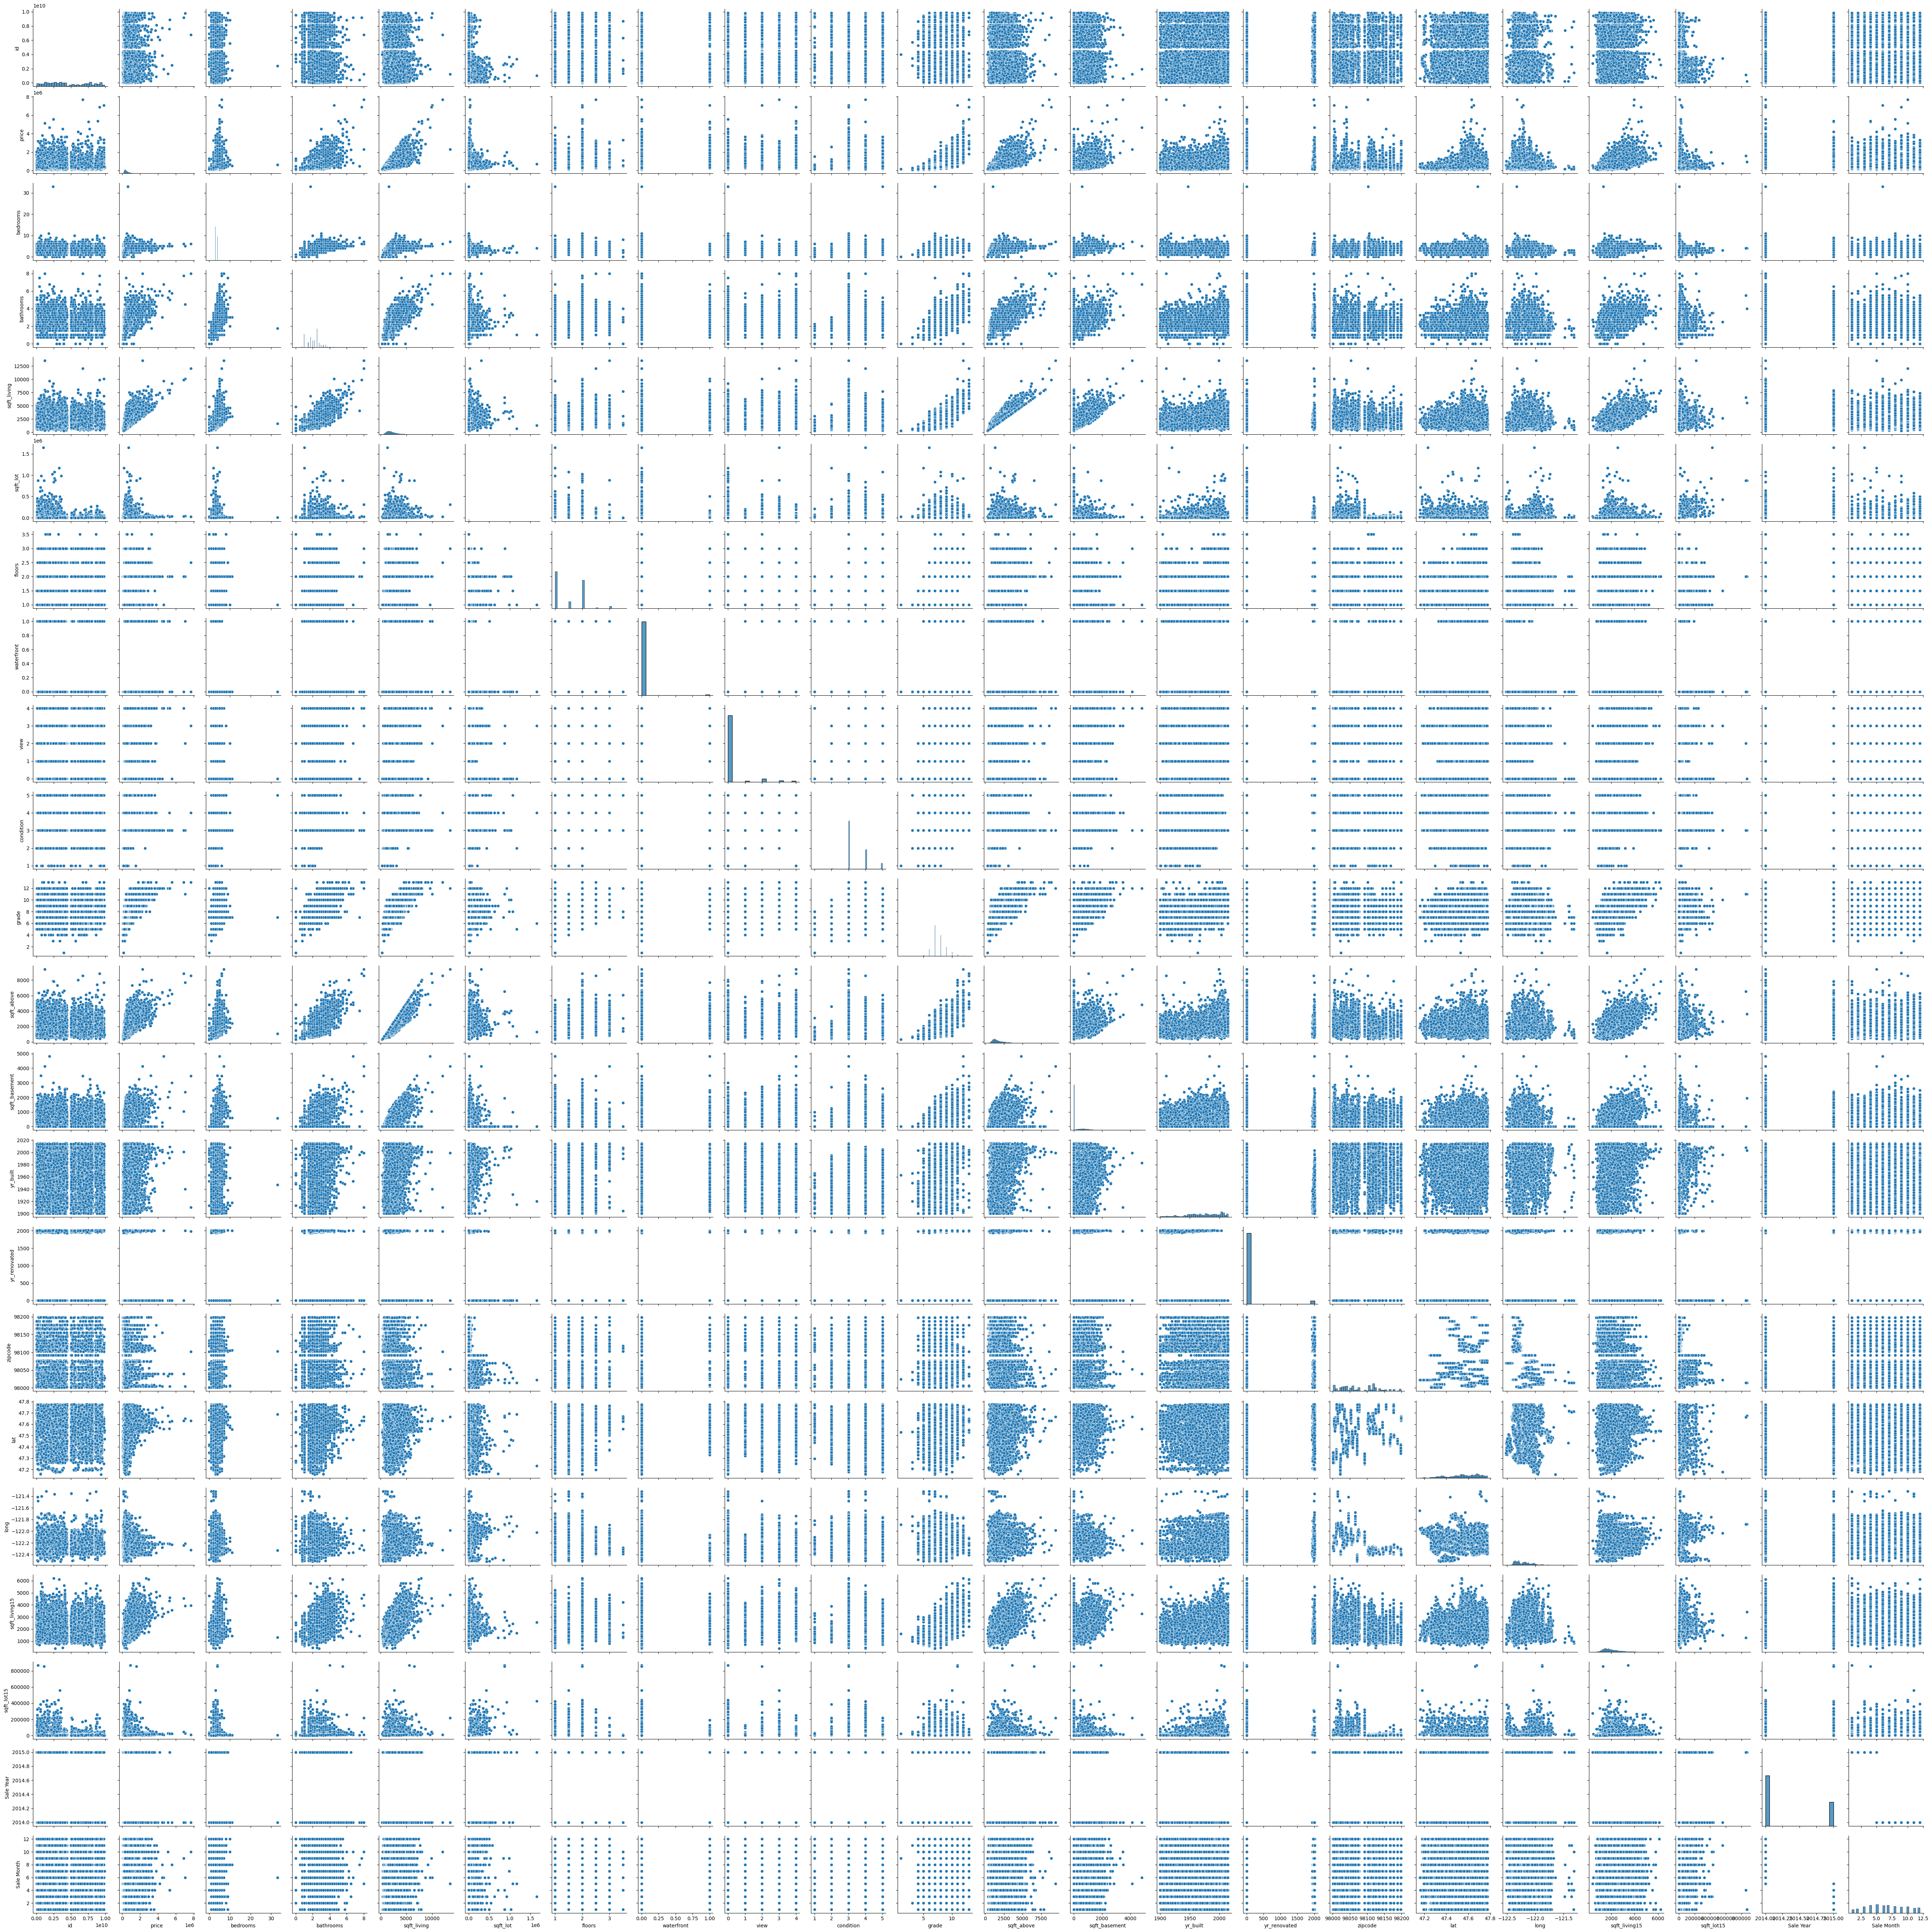

In [65]:
#pairplot
sns.pairplot(df)

Let's look at some trends using preliminary scatterplots first as part of EDA. 

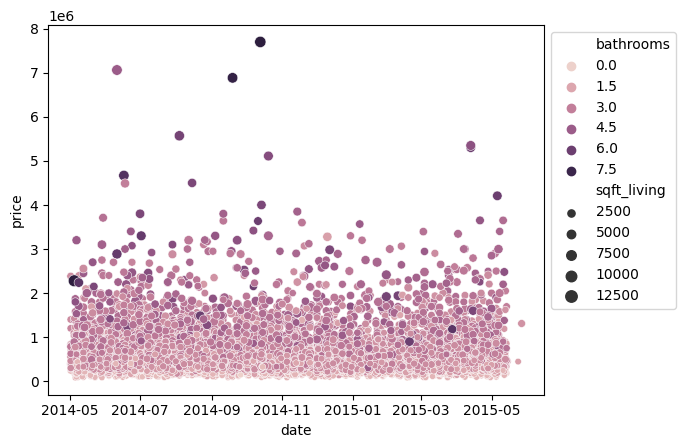

In [66]:
ax = sns.scatterplot(data = df, x='date', y='price', size = 'sqft_living', hue = 'bathrooms')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

As suspected, smaller houses with fewer bathrooms are cheapest with price is positive correlated with the same features. In terms of the temporal effect, we see that the housing prices from 2014-05 to 2015-05 are fairly consistent with a few larger, more expensive homes being sold in the second half of 2014.

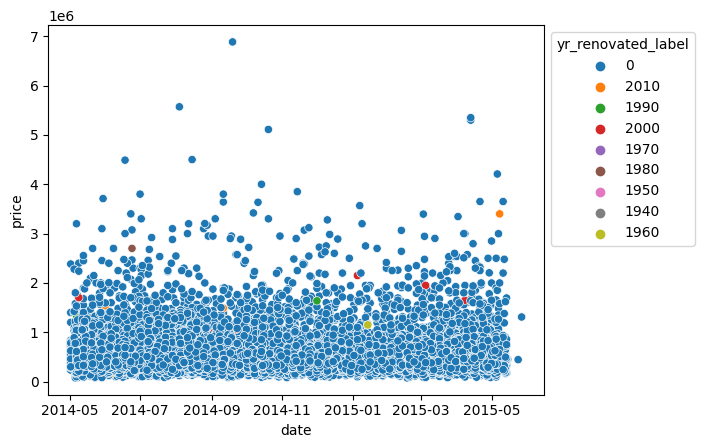

In [67]:
df_copy = df.copy()

# Define the mapping dictionary for 'yr_renovated' labels
label_mapping = {0: '0',
                 1900: '1910',
                 1910: '1910',
                 1920: '1920',
                 1930: '1930',
                 1940: '1940',
                 1950: '1950',
                 1960: '1960',
                 1970: '1970',
                 1980: '1980',
                 1990: '1990',
                 2000: '2000',
                 2010: '2010'}

# Map the labels based on the 'yr_renovated' column
df_copy['yr_renovated_label'] = df_copy['yr_renovated'].map(label_mapping)

# Create the lmplot with the updated labels
ax = sns.scatterplot(data=df_copy, x='date', y='price', hue='yr_renovated_label')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

We see very few of the sold homes are renovated and appear to be in their original condition. Given the volume of renovated homes in King Country, this feature may not provide much value given that there are features such as condition of the house, ranked from 1 to 5 and grade (construction quality).

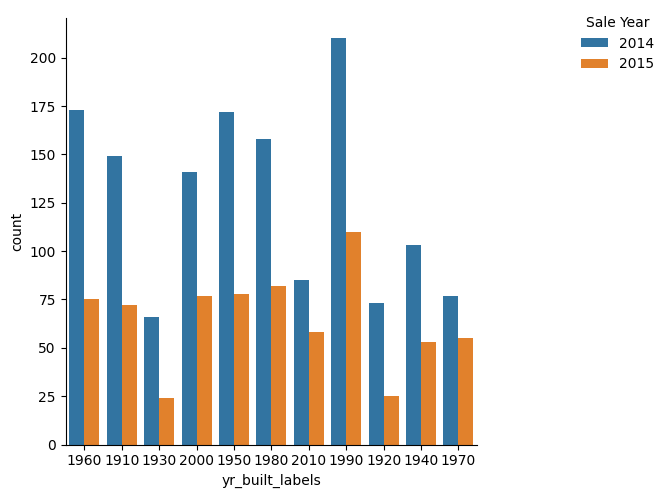

In [68]:
df_copy2  = df.copy()

# Define the mapping dictionary for 'yr_built' labels
label_mapping = {0: '0',
                 1900: '1910',
                 1910: '1910',
                 1920: '1920',
                 1930: '1930',
                 1940: '1940',
                 1950: '1950',
                 1960: '1960',
                 1970: '1970',
                 1980: '1980',
                 1990: '1990',
                 2000: '2000',
                 2010: '2010'}

# Map the labels based on the 'yr_renovated' column
df_copy2['yr_built_labels'] = df_copy['yr_built'].map(label_mapping)

ax = sns.catplot(data = df_copy2, x='yr_built_labels', hue = 'Sale Year', kind='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

We see that the majority of homes sold in King County vary dramatically in age. We cannot say for example, that King City is particularly affected by the rapid development of new subdivisions in the years 2014 and 2015. 

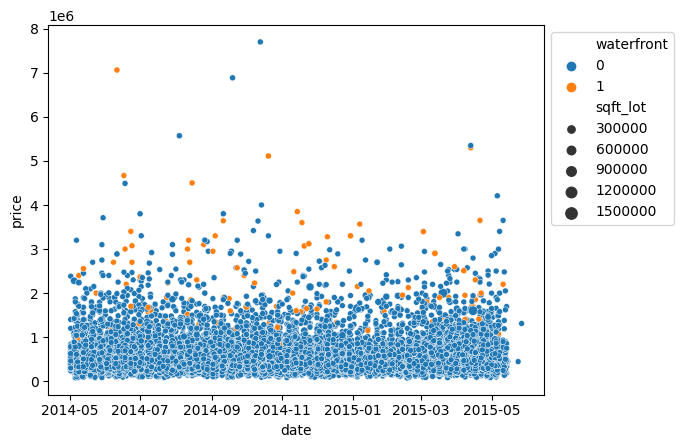

In [69]:
ax = sns.scatterplot(data = df, x='date', y='price', size = 'sqft_lot', hue = 'waterfront')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

As expected, waterfront homes tend to be higher in price. Lot sizes in King County appear to be relatively consistent. 

### Linear Regression (for Feature Selection)
Feature selection eliminating colinear features using Pearsons Correlation Matrix

In [70]:

# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                 'sqft_living15', 'sqft_lot15']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear, Select Features):", mse)

Mean Squared Error (Linear, Select Features): 45173046132.79021


This MSE value is quite high. Let's add more thematically unique variables still eliminating those found to be colinear in our Pearsons matrix. 

In [71]:
# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 
                 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 45634325863.909096


We see that the model generating a slightly higher MSE with fewer parameters. We accept this trade off to hopefully reduce colinearity. Iteratively, I have added and removed variables recursively testing their signficance. This is the set of features that I arrived at which provided the smallest increases to the MSE while minimizing the number of features. 

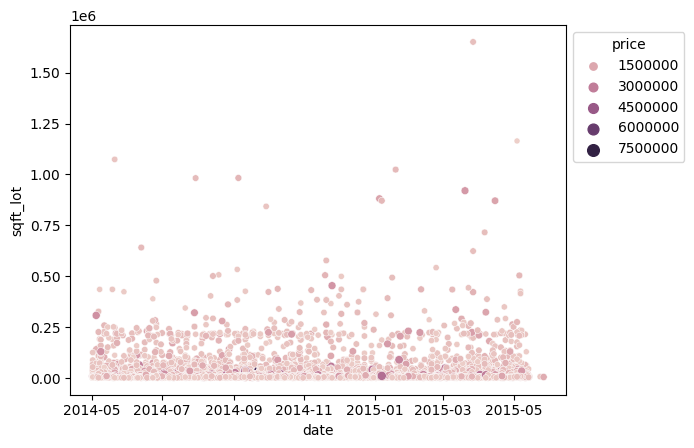

In [90]:
ax = sns.scatterplot(data = df, x='date', y='sqft_lot', size = 'price', hue = 'price')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Ordinary Least Squares Regression
Given that the OLS model is senstive to multi-collinearity, we will feed it only features that were most significant in the linear model. OLS assumes that the features are not highly correlated with each other (multicollinearity). When multicollinearity exists, it can impact the coefficient estimates and their interpretation. OLS can be sensitive to outliers, as it tries to minimize the sum of squared residuals. OLS does not explicitly perform feature selection. 

In [91]:
# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 
                 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]
target = df['price']

# Add a constant column to the features
features = sm.add_constant(features)

# Create an OLS model
model = sm.OLS(target, features)

# Fit the model
results = model.fit()

# Calculate the predicted values
y_pred = results.predict(features)

# Print the model's results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     4144.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:30:11   Log-Likelihood:            -2.9470e+05
No. Observations:               21613   AIC:                         5.894e+05
Df Residuals:                   21600   BIC:                         5.895e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.306e+07   2.78e+06      4.701

In [92]:
# Print the MSE of the ols model
mse_ols = mean_squared_error(target, y_pred)
print("Mean Squared Error (OLS):", mse_ols)

Mean Squared Error (OLS): 40815574226.75089


Since [2] indicates that strong multicollineary is a significant concern in the OLS analysis, we will explore LASSO and ridge regression, which explicitly accounts for multicollinearity by introducing a penalty term in the regression objective function. sft_above, sqft_basement and yr_renovated appear to be least significant in the OLS model based on the scale of their coefficient.

### LASSO

The Lasso model zeros out coefficients, effectively performing feature selection by eliminating less important features. We will feed it all the features and assess the output.

In [93]:
from sklearn.linear_model import Lasso

# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
               'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
               'sqft_living15', 'sqft_lot15']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Lasso regression model
model = Lasso(alpha=10)  # Adjust the alpha value for stronger or weaker regularization

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Lasso): 45178009648.7226


c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.086e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [94]:
# Access the lasso coefficients
coefficients = model.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
coefficients_df['Coefficient_Abs'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient_Abs', ascending=False)

# Print the coefficients
print(coefficients_df)

          Feature    Coefficient  Coefficient_Abs
14            lat  595316.204609    595316.204609
5      waterfront  560833.051756    560833.051756
15           long -193679.065700    193679.065700
8           grade   94594.517638     94594.517638
6            view   53692.719558     53692.719558
1       bathrooms   44534.902314     44534.902314
0        bedrooms  -34325.651504     34325.651504
7       condition   24490.842468     24490.842468
4          floors    6995.679357      6995.679357
11       yr_built   -2682.147332      2682.147332
13        zipcode    -550.868145       550.868145
2     sqft_living     280.392269       280.392269
10  sqft_basement    -132.327966       132.327966
9      sqft_above    -101.349671       101.349671
16  sqft_living15      21.181885        21.181885
12   yr_renovated      20.423290        20.423290
17     sqft_lot15      -0.326253         0.326253
3        sqft_lot       0.088442         0.088442


### Ridge

In [95]:
import pandas as pd
from sklearn.linear_model import Ridge

# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                 'sqft_living15', 'sqft_lot15']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Ridge regression model
model = Ridge(alpha=10)  # Adjust the alpha value for stronger or weaker regularization

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse_ridge = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge):", mse_ridge)


Mean Squared Error (Ridge): 45308952050.28481


In [96]:
# Access the ridge coefficients
coefficients = model.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
coefficients_df['Coefficient_Abs'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient_Abs', ascending=False)

# Print the coefficients
print(coefficients_df)

          Feature    Coefficient  Coefficient_Abs
14            lat  574628.544526    574628.544526
5      waterfront  512897.526597    512897.526597
15           long -183803.859441    183803.859441
8           grade   95225.542813     95225.542813
6            view   55467.366823     55467.366823
1       bathrooms   44695.917565     44695.917565
0        bedrooms  -34684.928661     34684.928661
7       condition   24271.232328     24271.232328
4          floors    7907.043829      7907.043829
11       yr_built   -2717.504720      2717.504720
13        zipcode    -529.807480       529.807480
2     sqft_living     109.223809       109.223809
9      sqft_above      69.530574        69.530574
10  sqft_basement      39.693268        39.693268
16  sqft_living15      20.902229        20.902229
12   yr_renovated      20.576423        20.576423
17     sqft_lot15      -0.330648         0.330648
3        sqft_lot       0.081866         0.081866


We can see that lot square footage has found to again be relatively insignificant as the Ridge model has effectively zeroed the features. 
These features have been downweighted or shrunk towards zero by the regularization term in Ridge regression.

### Elastic Net

In [97]:
from sklearn.linear_model import ElasticNet

# Select the features and the target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
               'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
               'sqft_living15', 'sqft_lot15']]
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio values

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse_en = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Elastic Net):", mse_en)

Mean Squared Error (Elastic Net): 58303440295.350815


c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.563e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


## Model Results
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?


In [99]:
print("Root Mean Squared Error (OLS):", round(np.sqrt(mse_ols), 2))
print("Root Mean Squared Error (Ridge):", round(np.sqrt(mse_ridge), 2))
print("Root Mean Squared Error (Elastic Net):", round(np.sqrt(mse_en), 2))
print("Root Mean Squared Error (Lasso):", round(np.sqrt(mse_lasso), 2))

Root Mean Squared Error (OLS): 202028.65
Root Mean Squared Error (Ridge): 212859.0
Root Mean Squared Error (Elastic Net): 241461.05
Root Mean Squared Error (Lasso): 212551.19


Although the OLS model had the smallest MSE value with a very strong R value (~0.7), the model did generate a significant error regarding multicollinearity. i.e. [2] The smallest eigenvalue is 2.19e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular. 

Also given the manual nature of the model (features must be provided by the analyst), I cannot be certain I fed it the best features at my current level of expertise. Thus, considering the the MSE is the next lowest, and that that the alpha value was set to minimize the more insignificant feautres, I would select the Lasso model given the tools at my disposal. 

## Main Drivers for an Executive
3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

The main five (5) drivers of house prices are: 
- location - expressed by latitude and longitude
- proximity to the waterfront (1 if waterfront, 0 if not)
- grade - Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value, and
- view - An index from 0 to 4 of how good the view of the property was.

All 5 drivers represent an increase in house prices i.e. better grade, higher price with the exception of latitude and longitude. For these features, we see higher latitudes and more neagtive longitudes increasing house price. Thus, the more west (closer to 400) and the furhter north you are the higher the house price. 